In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
NUM_TRIALS = 3000
EPS = 0.3
BANDIT_PROBABILITIES = [0.2, 0.5, 0.75, 0.3]

In [3]:
class Bandit:
    def __init__(self, p):
        self.p = p
        self.p_estimate = 0.
        self.N = 0. 

    def pull(self):
        # draw a 1 with probability p
        return np.random.random() < self.p

    def update(self, x):
        self.N += 1.
        self.p_estimate = ((self.N - 1)*self.p_estimate + x) / self.N


In [4]:
def experiment():
    bandits = [Bandit(p) for p in BANDIT_PROBABILITIES] # Bandit arm machine built with known details

    rewards = np.zeros(NUM_TRIALS) # save rewarsd for Each experiment TRIALS
    num_times_explored = 0 # for more detail about TRIALS
    num_times_exploited = 0 #same
    num_optimal = 0 #same
    optimal_j = np.argmax([bandit.p for bandit in bandits])#same
    print("optimal j:", optimal_j)#same

    for i in range(NUM_TRIALS):

        # use epsilon-greedy to select the next bandit
        if np.random.random() < EPS:
            num_times_explored += 1
            j = np.random.randint(len(bandits))
        else:
            num_times_exploited += 1
            j = np.argmax([b.p_estimate for b in bandits])

        if j == optimal_j:
            num_optimal += 1

        # pull the arm for the bandit with the largest sample
        x = bandits[j].pull()

        # update rewards log
        rewards[i] = x

        # update the distribution for the bandit whose arm we just pulled
        bandits[j].update(x)
    
    
    for b in bandits:
        print("Mean estimate:", b.p_estimate)

    # print total reward
    print("Total reward earned:", rewards.sum())
    print("Overall win rate:", rewards.sum() / NUM_TRIALS)
    print("num of times_explored:", num_times_explored)
    print("num of times_exploited:", num_times_exploited)
    print("num times selected optimal bandit:", num_optimal)

    
    # plot the results
    cumulative_rewards = np.cumsum(rewards)
    win_rates = cumulative_rewards / (np.arange(NUM_TRIALS) + 1)
    plt.plot(win_rates)
    plt.plot(np.ones(NUM_TRIALS)*np.max(BANDIT_PROBABILITIES))
    plt.show()

optimal j: 2
Mean estimate: 0.1863799283154122
Mean estimate: 0.4978723404255319
Mean estimate: 0.7480245829675156
Mean estimate: 0.27884615384615413
Total reward earned: 1931.0
Overall win rate: 0.6436666666666667
num of times_explored: 895
num of times_exploited: 2105
num times selected optimal bandit: 2278


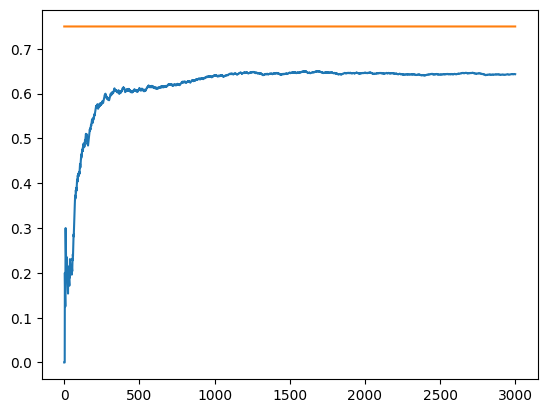

In [5]:
experiment()